# Table of Contents

- [1. Project Title]()
- [2. Library import and data loading](#2-Library-import-and-data-loading)
  - [2.1 Library imports](##Library-import)
  - [2.2 Loading uncleand dataset](##Loading-uncleaned-data)
- [3. Data Analysis,Preparation and Wrangling](#3-Data-Analysis-Preparation-and-Wrangling)
  - [3.1 Handling missing rows](##Handling-missing-rows)
  - [3.2 Handling the currency symbols and comma format](##Handling-the-currency-symbols-and-comma-format)
  - [3.3 Handling non-valid column names](##Handling-non_valid-column-names)
  - [3.4 Handling missing values in columns: fuel_type](##Handling-missing-values-in-columns:-fuel_type)
  - [3.5 Handling missing values and comma format in columns: mileage](##Handling-missing-values-and-comma-format-in-columns:-mileage)
  - [3.6 Handling missing values and different value standard in columns: engine_size](##Handling-missing-values-and-different-value-standard-in-columns:-engine_size)
  - [3.7 Handling wrong data type: year](##Handling-wrong-data-type:-year)
  - [3.8 Handling unneeded columns](##Handling-unneeded-columns)
  - [3.9 Handling categorical data](##Handling-categorical-data)
  - [3.10 Saving the cleaned data into csv](##Saving-the-cleaned-data-into-csv)
- [4 Exploratory Data Analysis and Visualization](#4-Exploratory-Data-Analysis-and-Visualization)
  - [4.1 Cars with lower mileage will worth more than cars with higher mileage](##Question1)
  - [4.2 Newer cars based on the year will be worth more](##Question2)
  - [4.3 Transmission types affects the price of the car](##Question3)
- [5 Feature Observation and Hypothesis](#5-Feature-Observation-and-Hypothesis)
- [6 A Simple Linear Regression Model](#6-A-Simple-Linear-Regression-Model)
  - [6.1 Split the dataset into training and test sets](##Split-the-dataset-into-training-and-test-sets)
  - [6.2 Simple Linear Regression Model Trining Testing](##Simple-Linear-Regression-Model-Trining_Testing)
  - [6.3 Simple Linear Regression Model performance metric](##Simple-Linear-Regression-Model-performance-metric)
  - [6.4 Linear Regression Model with Lasso/Ridge training testing](##Linear-Regression-Model-with-Lasso/Ridge-training-testing)
  - [6.4 Linear Regression Model with Lasso/Ridge performance metric](##Linear-Regression-Model-with-Lasso/Ridge-performance-metric)
  - [6.5 Polynomial Regression Model (with Lasso/Ridge)](##Polynomial-Regression-Model-with-Lasso/Ridge)
- [8 Polynomial Regression Model](#8-Polynomial-Regression-Model)
- [Competition](#Competition)




# Predicting resale value of cars
## Dataset: UK’s craiglist car

### Group Members
- Shedrach Ezenwali  300377414
- Bryan Rodriguez    300369955
- Hazel Ibasco       300366644
- Nathaniel Pearson  300387657

____

# 2-Library-import-and-data-loading

____

## Library-import

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Loading-uncleaned-data

In [218]:
df = pd.read_csv("./data/unclean_data.csv")

____

# 3-Data-Analysis-Preparation-and-Wrangling

____

In [219]:
## A look of the data set
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [220]:
## Let's get general information about the data, the shape and also the data type

def get_data_description(df)->None:
    '''Take a dataframe and prints out a consise 
    description based on the data shape'''
    rows,cols = df.shape

    print(f'We have {rows} rows and {cols} columns in the data set')

get_data_description(df)



We have 4006 rows and 11 columns in the data set


In [221]:
## Checking of the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


From first look, some data type are wrong. 
<div><ins>Some few points to note</ins></div>

- for example the year is a floating point number which logically year can only be an integer.
- Price appears as a string probably due to the currency symbol

Finally there are some NaN values in the data set

In [222]:
## Getting the percentage of missing values in each column

def check_cols_with_null(df):
    '''Gets  dataframe and prints out percentage of missing values in each column'''
    print(    df.shape)
    for col in df.columns:
        print(f'{col}: {format((df[col].isnull().sum()/df.shape[0])*100,".0f")}%')

check_cols_with_null(df)

(4006, 11)
model: 2%
year: 3%
price: 2%
transmission: 2%
mileage: 5%
fuel type: 67%
engine size: 4%
mileage2: 3%
fuel type2: 5%
engine size2: 5%
reference: 2%


Fuel type has the highest missing value in the data set. This NaN values will be handled appropriately as we progress

## Handling-missing-rows

In [223]:
## Drop rows that have all columns as nan
df.dropna(inplace=True,how="all")

In [224]:
## Resetting row index
df.reset_index(inplace=True,drop=True)

In [225]:
get_data_description(df)

We have 3907 rows and 11 columns in the data set


## Handling-the-currency-symbols-and-comma-format

In [226]:
## Current price format
df.price.head()

0     £30,495
1     £29,989
2     £37,899
3     £30,399
4     £29,899
Name: price, dtype: object

In [227]:
df.price = df.price.str.replace('£|,',"",regex=True)

In [228]:
## change price to a floating point value

df.price = df.price.astype(float)

In [229]:
## Formatted price column
df.price.head()

0    30495.0
1    29989.0
2    37899.0
3    30399.0
4    29899.0
Name: price, dtype: float64

## Handling-non_valid-column-names

In [230]:
#columns to rename and their corresponding new names

columns_map = {
    "fuel type":"fuel_type",
    "fuel type2":"fuel_type2",
    "engine size":"engine_size",
    "engine size2":"engine_size2"
}

df.rename(columns=columns_map,inplace = True)

In [231]:
df.head(1)

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495.0,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331


## Handling-missing-values-in-columns:-fuel_type

In [232]:
#initially we noticed that there was a lot of missing values in the 'fuel column' see below for percentages of missing values

check_cols_with_null(df[["fuel_type","fuel_type2"]])

(3907, 2)
fuel_type: 66%
fuel_type2: 3%


About 66% of the values in the fuel_type column is missing, at this point we can decide to drop it, however before we drop the column we need to it values to fill the fuel_types column with reduce it from 3% or possibly drop it to 0%

In [233]:
df.fuel_type2.fillna(df.fuel_type,inplace=True)

In [234]:
df.fuel_type2.isna().sum()

0

In [235]:
df.drop(["fuel_type"],axis=1,inplace=True)
df.rename(columns={'fuel_type2':'fuel_type'},inplace=True)

df.head(1)

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495.0,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331


## Handling-missing-values-and-comma-format-in-columns:-mileage

In [236]:
## checking percentage of missing data in millage

check_cols_with_null(df[["mileage","mileage2"]])

(3907, 2)
mileage: 3%
mileage2: 0%


In [237]:
df.mileage.fillna(df.mileage2,inplace=True)
df.mileage = df.mileage.str.replace(",","")

In [238]:
df.mileage = pd.to_numeric(df.mileage,errors='coerce')

In [239]:
df.drop(["mileage2"],axis=1,inplace=True)

## Handling-missing-values-and-different-value-standard-in-columns:-engine_size

In [240]:
## checking percentage of missing data in millage

check_cols_with_null(df[["engine_size","engine_size2"]])

(3907, 2)
engine_size: 2%
engine_size2: 3%


In [241]:
df.engine_size2.fillna(df.engine_size,inplace=True)

In [242]:
df.engine_size2 = pd.to_numeric(df['engine_size2'],errors="coerce")

In [243]:
df.engine_size2.describe()

count    3905.000000
mean      249.148513
std       706.052083
min         0.000000
25%         2.000000
50%         2.000000
75%         2.100000
max      6208.000000
Name: engine_size2, dtype: float64

In [244]:
def convert_engine_size(engine_size):
    if engine_size > 1000:
        return round(engine_size/1000,1)
    
    return round(engine_size,1)


df.engine_size2 = df.engine_size2.apply(lambda x:convert_engine_size(x))

In [245]:
df.drop(["engine_size"],axis=1,inplace=True)

df.rename(columns={'engine_size2':'engine_size'},inplace=True)

In [246]:
df.head(1)

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495.0,Automatic,1200.0,Diesel,2.0,/ad/25017331


## Handling-wrong-data-type:-year

In [247]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [248]:
df.year = df.year.astype('int64') 

## Handling-unneeded-columns

In [249]:
# Dropping the model and reference columns.

df.drop(["model","reference"],axis=1,inplace=True)

## Handling-categorical-data

In [250]:
df = df.join(pd.get_dummies(df[['transmission',"fuel_type"]],dtype=int))

In [251]:
transmission_type = df.transmission
df.drop(["transmission","fuel_type"],axis=1,inplace=True)

In [252]:
get_data_description(df)

We have 3898 rows and 12 columns in the data set


In [253]:
df.head()

,year,price,mileage,engine_size,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,2020,30495.0,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989.0,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899.0,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399.0,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899.0,4500.0,2.0,1,0,0,0,1,0,0,0


## Saving-the-cleaned-data-into-csv

In [254]:
df.to_csv("./data/cleaned_data.csv")

____

# 4-Exploratory-Data-Analysis-and-Visualization

____

Based on the domain knowledge we could say the following

 - Cars with lower mileage will worth more than cars with higher mileage
 - Newer cars based on the year will be worth more
 - Transmission types affects the price of the car
 - There's a correlations between 'year', 'transmission', and 'price'

## Question1
#### Cars with lower mileage will worth more than cars with higher mileage

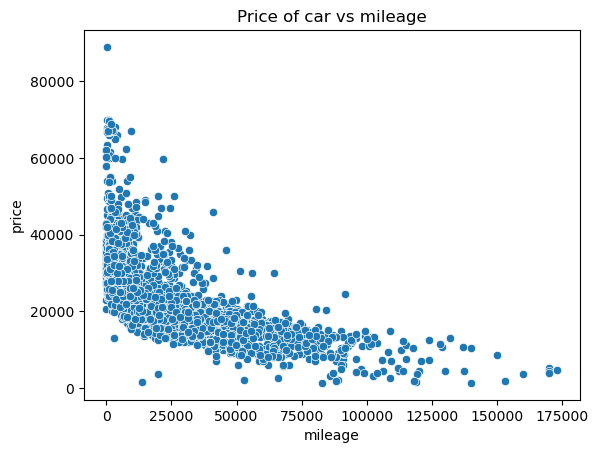

In [255]:
## let's see the mileage data

sns.scatterplot(x=df.mileage,y=df.price)

plt.title("Price of car vs mileage")

plt.show()

Based on the scattered plot above, we can conlude the prices of car increases with low mileage

So the mileage parameter is an important independent variable.

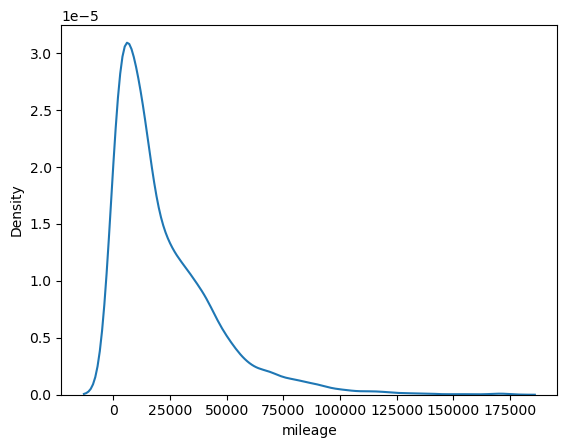

In [256]:
sns.kdeplot(df.mileage)
plt.show()

    The mileage is positive skewed, we can consider taking a log of it and removing outliers to normalize it
    

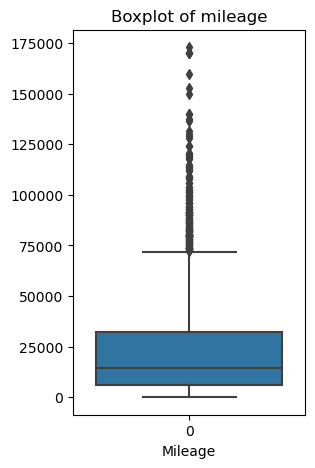

In [257]:
### Visualization of outliers

plt.figure(figsize=(3,5))

sns.boxplot(df.mileage)

plt.title("Boxplot of mileage")
plt.xlabel("Mileage")
plt.show()

## Question2
####  Newer cars based on the year will be worth more

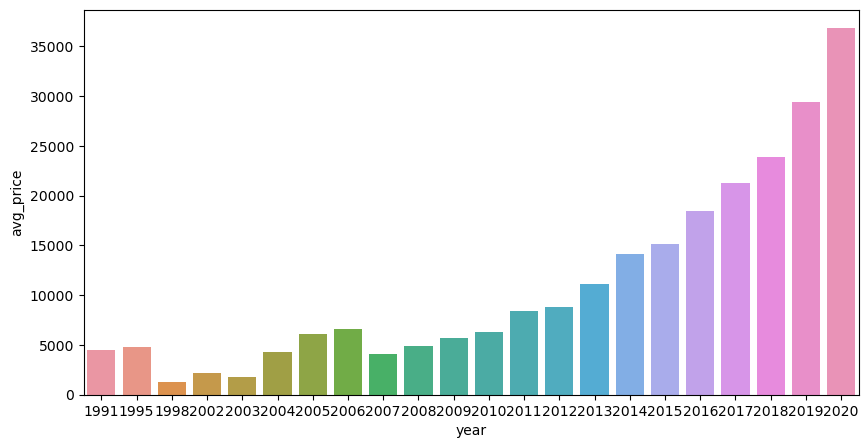

In [258]:
## lets group the data set by year and get the mean price of the car
year_price = df.groupby("year")[["price"]].mean().price

year_price =  pd.DataFrame({'year': year_price.index, 
              'avg_price': year_price.values})
year_price

plt.figure(figsize=(10,5))

sns.barplot(x="year", y="avg_price",data=year_price)
plt.show()

From the above trend newer cars worth more compared with older cars

## Question3

####  Transmission types affects the price of the car

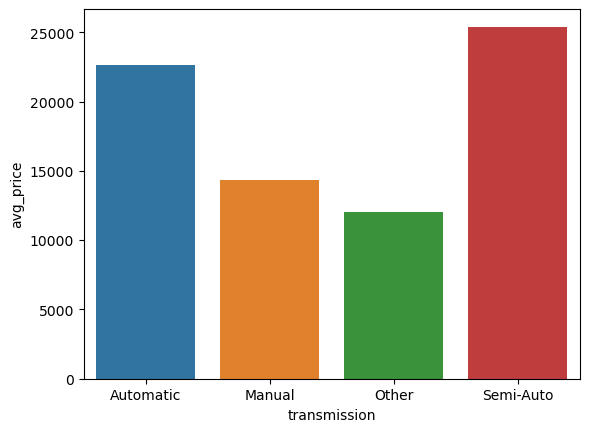

In [259]:
transmission_type_price_df = df.join(transmission_type)

transmission_type_price = transmission_type_price_df.groupby("transmission")[["price"]].mean().price


transmission_type_price =  pd.DataFrame({'transmission': transmission_type_price.index, 
              'avg_price': transmission_type_price.values})


sns.barplot(x="transmission", y="avg_price",data=transmission_type_price)
plt.show()

In [260]:
df.loc[df.transmission_Other == 1].shape

(1, 12)

We will drop the cars with transmittion as other due to the fact that it has just on column.

In [261]:
df = df.loc[df.transmission_Other != 1]

df.drop(["transmission_Other"],axis=1,inplace=True)

## Question 4

How fuel types affect price visualization

In [262]:
#Averaging the price values
Diesel_price_sum = df.loc[df['fuel_type_Diesel'] == 1, 'price'].sum()
Diesel_sum = df.loc[df['fuel_type_Diesel'] == 1, 'fuel_type_Diesel'].sum()
Diesel_average = Diesel_price_sum/Diesel_sum

Hybrid_price_sum = df.loc[df['fuel_type_Hybrid'] == 1, 'price'].sum()
Hybrid_sum = df.loc[df['fuel_type_Hybrid'] == 1, 'fuel_type_Hybrid'].sum()
Hybrid_average = Hybrid_price_sum/Hybrid_sum

Petrol_price_sum = df.loc[df['fuel_type_Petrol'] == 1, 'price'].sum()
Petrol_sum = df.loc[df['fuel_type_Petrol'] == 1, 'fuel_type_Petrol'].sum()
Petrol_average = Petrol_price_sum/Petrol_sum

Other_price_sum = df.loc[df['fuel_type_Other'] == 1, 'price'].sum()
Other_sum = df.loc[df['fuel_type_Other'] == 1, 'fuel_type_Other'].sum()
Other_average = Other_price_sum/Other_sum

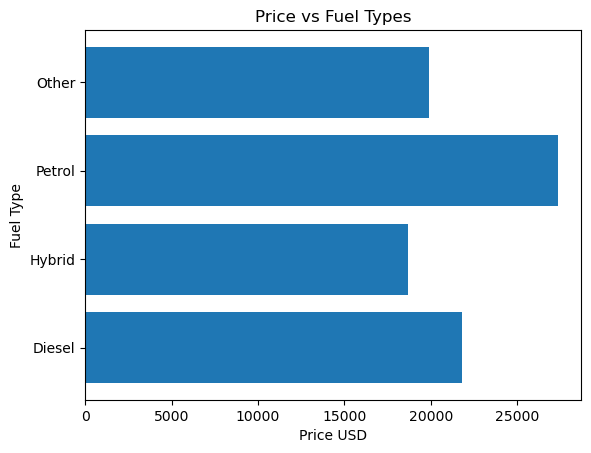

In [263]:
# Creating a horizontal bar chart

categories = ['Diesel', 'Hybrid', 'Petrol', 'Other']
values = [Diesel_average, Hybrid_average, Petrol_average, Other_average]
colormap = plt.cm.viridis(np.linspace(0, 1, len(categories)))
plt.barh(categories, values, color=colormap)


plt.barh(categories, values)

plt.xlabel('Price USD')
plt.ylabel('Fuel Type')
plt.title('Price vs Fuel Types')

plt.show()

____

# 5-Feature-Observation-and-Hypothesis

____

From the EDA it was observed that the Mileage and Price are strongly negative correlated. However, they exit some outliers in the mileage data.

In [264]:
## Using IQR approach to remove outliers

Q1 = df.mileage.quantile(0.25)
Q3 = df.mileage.quantile(0.75)

IQR=Q3-Q1
outliers = df.loc[((df.mileage<(Q1-1.5*IQR)) | (df.mileage>(Q3+1.5*IQR)))]


# description of the outliers
get_data_description(outliers)

We have 156 rows and 11 columns in the data set


### droping outliers based on mileage 

In [265]:
df.drop(outliers.index,inplace=True)

## Checking for correlation 

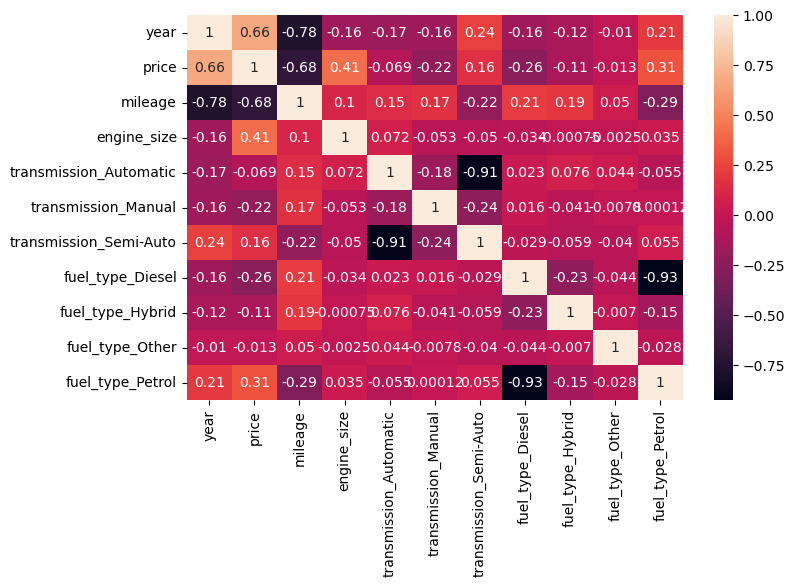

In [266]:
corr = df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)

plt.show()

From the correlation few multicollinearity can be observed 

    - fuel_type_Petrol and fuel_type_Diesel
    - transmission_Semi-Auto and transmission_Automatic

the correlation for between the mileage and year is slightly stronger, but we can ignore it for now.

In [267]:
corr

,year,price,mileage,engine_size,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
year,1.000000,0.663213,-0.775178,-0.162465,-0.174648,-0.159204,0.237752,-0.159298,-0.118242,-0.010401,0.207975
price,0.663213,1.000000,-0.679376,0.409893,-0.069402,-0.218385,0.158131,-0.259855,-0.106093,-0.013203,0.305890
mileage,-0.775178,-0.679376,1.000000,0.104905,0.149263,0.166180,-0.215552,0.212649,0.194754,0.050231,-0.294454
engine_size,-0.162465,0.409893,0.104905,1.000000,0.072478,-0.052839,-0.049873,-0.034122,-0.000748,-0.002475,0.035197
transmission_Automatic,-0.174648,-0.069402,0.149263,0.072478,1.000000,-0.176572,-0.914804,0.022557,0.076309,0.044222,-0.055396
transmission_Manual,-0.159204,-0.218385,0.166180,-0.052839,-0.176572,1.000000,-0.236023,0.015689,-0.040659,-0.007808,0.000125
transmission_Semi-Auto,0.237752,0.158131,-0.215552,-0.049873,-0.914804,-0.236023,1.000000,-0.028707,-0.058653,-0.040454,0.054639
fuel_type_Diesel,-0.159298,-0.259855,0.212649,-0.034122,0.022557,0.015689,-0.028707,1.000000,-0.231292,-0.044418,-0.926132
fuel_type_Hybrid,-0.118242,-0.106093,0.194754,-0.000748,0.076309,-0.040659,-0.058653,-0.231292,1.000000,-0.006969,-0.145303
fuel_type_Other,-0.010401,-0.013203,0.050231,-0.002475,0.044222,-0.007808,-0.040454,-0.044418,-0.006969,1.000000,-0.027905


In [268]:
corr_len = corr.shape[0]
columns_in_corr = np.full((corr_len,), True)

#removing columns with multicollinearity and keeping one

for i in range(corr_len):
    for j in range(i+1, corr_len):
        if np.abs(corr.iloc[i,j]) >= 0.8:
            columns_in_corr[j] = False
            
            
df = df[df.columns[columns_in_corr]]     
                

In [269]:
df.head(2)

,year,price,mileage,engine_size,transmission_Automatic,transmission_Manual,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other
0,2020,30495.0,1200.0,2.0,1,0,1,0,0
1,2020,29989.0,1000.0,1.5,1,0,0,0,0


    The engine size shows now  no association with the target variable 'Price"

for futher insight, lets test the hypothesis

    H0: Engine size does not affects the price of the car
    H1: Engine size does affects the price of the car

    significance level 0.05

In [270]:
X = df[['engine_size']]
y = df['price']

slope, intercept, r_value, p_value, std_err = linregress(X.values.flatten(), y)

print("P-value for 'engine_size':", p_value)

P-value for 'engine_size': 1.4488877996809193e-151


    The P-value is close to zero (statistically significant) we reject H0

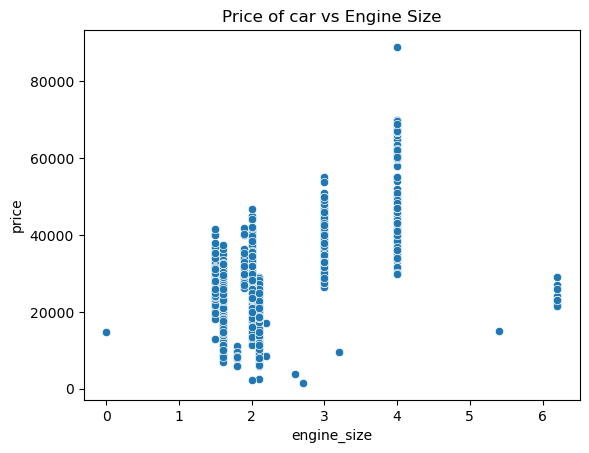

In [271]:
## let's see the fit of the engine_size vs price

sns.scatterplot(x=df.engine_size,y=df.price)

plt.title("Price of car vs Engine Size")

plt.show()

___

# 6-A-Simple-Linear-Regression-Model

___

## Split-the-dataset-into-training-and-test-sets
We will split 90:10 and using randomstate=42.

In [272]:
response = df.price
features = df.drop(["price"],axis=1)

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(features,response,test_size=0.1,random_state=42)

## Simple-Linear-Regression-Model-Trining_Testing

In [274]:
# model building

model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [275]:
# get the predictions for the test dataset
predictions = model.predict(X_test)

## Simple-Linear-Regression-Model-performance-metric

In [276]:
RMSE = math.sqrt(mean_absolute_error(Y_test,predictions))

RMSE

52.21303485571943

In [277]:
# R-squared
r2_test = model.score(X_test,Y_test)
r2_train = model.score(X_train,Y_train)

print(f'R-squared test score : {r2_test}')
print(f'R-squared train score : {r2_train}')


R-squared test score : 0.7947341034780405
R-squared train score : 0.7854918795963556


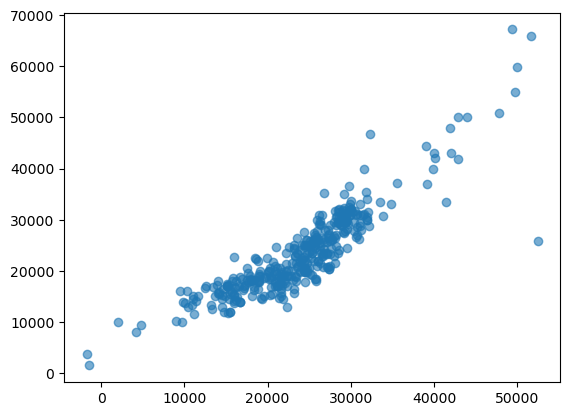

In [278]:
# plot the prediction vs actual

plt.scatter(predictions,Y_test,alpha=0.6)

plt.show()

#### Simple Linear Regression Model coefficients

In [279]:
coefficients_dict = {
    "feature": X_train.columns,
    "coefficients":model.coef_
}

df_coef = pd.DataFrame(coefficients_dict)

df_coef

,feature,coefficients
0,year,2084.815532
1,mileage,-0.182889
2,engine_size,9042.479752
3,transmission_Automatic,295.518250
4,transmission_Manual,-2479.792553
5,fuel_type_Diesel,-1718.895556
6,fuel_type_Hybrid,-600.069365
7,fuel_type_Other,1104.197543


## Linear-Regression-Model-with-Lasso/Ridge-training-testing

In [280]:
## simulating for best alpha value
alphas_ridge = 10**np.linspace(5,-5,20)
alphas_lasso = np.linspace(0.5,0.01,20)

def find_best_alpha_value_lasso_ridge(alphas_ridge,alphas_lasso,X_train,Y_train,X_test, Y_test):

    if(len(alphas_ridge) != len(alphas_lasso)):
        return
    
    
    lasso_model = Lasso()  
    ridge_model = Ridge()


    sim_dict = {
    "alpha_lasso":[],
    "R2_Lasso_test":[],
    "R2_Lasso_train":[],
    "RMSE_Lasso":[],
    "alpha_ridge":[],
    "R2_Ridge_test":[],
    "R2_Ridge_train":[],
    "RMSE_Ridge":[]
    }

    for  i in range(len(alphas_ridge)):
        alpha_current_ridge = alphas_ridge[i]
        alpha_current__lasso = alphas_lasso[i]
        

        lasso_model.set_params(alpha = alpha_current__lasso,max_iter =1000)
        lasso_model.fit(X_train, Y_train)
        lasso_predictions = lasso_model.predict(X_test)
        r2_Lasso_test = lasso_model.score(X_test, Y_test)
        r2_Lasso_train = lasso_model.score(X_train, Y_train)
        rmse_Lasso = math.sqrt(mean_absolute_error(Y_test,lasso_predictions))
    
        sim_dict["alpha_lasso"].append(alpha_current__lasso)
        sim_dict["R2_Lasso_test"].append(r2_Lasso_test)
        sim_dict["R2_Lasso_train"].append(r2_Lasso_train)
        sim_dict["RMSE_Lasso"].append(rmse_Lasso)
    
        # Ridge_test
        ridge_model.set_params(alpha = alpha_current_ridge,max_iter =1000)
        ridge_model.fit(X_train, Y_train)
        ridge_predictions = ridge_model.predict(X_test)
        r2_ridge_test = ridge_model.score(X_test, Y_test)
        r2_ridge_train = ridge_model.score(X_train, Y_train)
        rmse_ridge = math.sqrt(mean_absolute_error(Y_test,ridge_predictions))
    
        sim_dict["alpha_ridge"].append(alpha_current_ridge)
        sim_dict["R2_Ridge_test"].append(r2_ridge_test)
        sim_dict["R2_Ridge_train"].append(r2_ridge_train)
        sim_dict["RMSE_Ridge"].append(rmse_ridge)
        
        
    return sim_dict

sim_dict = find_best_alpha_value_lasso_ridge(alphas_ridge,alphas_lasso,X_train,Y_train,X_test, Y_test)

simulated_alphas_df = pd.DataFrame(sim_dict) 


simulated_alphas_df

,alpha_lasso,R2_Lasso_test,R2_Lasso_train,RMSE_Lasso,alpha_ridge,R2_Ridge_test,R2_Ridge_train,RMSE_Ridge
0,0.500000,0.794751,0.785489,52.220518,100000.000000,0.445881,0.471113,64.323425
1,0.474211,0.794751,0.785489,52.220132,29763.514416,0.468915,0.487003,63.731566
2,0.448421,0.794750,0.785489,52.219746,8858.667904,0.525329,0.528956,62.167073
3,0.422632,0.794750,0.785490,52.219360,2636.650899,0.623341,0.612534,59.103953
4,0.396842,0.794749,0.785490,52.218974,784.759970,0.729200,0.714512,55.132628
5,0.371053,0.794748,0.785490,52.218588,233.572147,0.783086,0.770224,52.822024
6,0.345263,0.794748,0.785490,52.218202,69.519280,0.794353,0.783382,52.307841
7,0.319474,0.794747,0.785491,52.217816,20.691381,0.795133,0.785251,52.225378
8,0.293684,0.794746,0.785491,52.217430,6.158482,0.794899,0.785463,52.219283
9,0.267895,0.794745,0.785491,52.217044,1.832981,0.794785,0.785488,52.218616


In [281]:
best_alpha_lasso = simulated_alphas_df.loc[simulated_alphas_df.R2_Lasso_test == simulated_alphas_df.R2_Lasso_test.max()].alpha_lasso.values[0]
best_alpha_ridge = simulated_alphas_df.loc[simulated_alphas_df.R2_Ridge_test == simulated_alphas_df.R2_Ridge_test.max()].alpha_ridge.values[0]


In [282]:
# using default alpha value of 10
lasso_model = Lasso(alpha=best_alpha_lasso)  
# using default alpha value of 10
ridge_model = Ridge(alpha=best_alpha_ridge)  

#using initial data split
lasso_model.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)

display(lasso_model.fit(X_train, Y_train),
ridge_model.fit(X_train, Y_train))

Lasso(alpha=0.5)

Ridge(alpha=20.6913808111479)

In [283]:
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)

## Linear-Regression-Model-with-Lasso/Ridge-performance-metric

In [284]:
r2_Lasso_test = lasso_model.score(X_test,Y_test)
r2_ridge_test = ridge_model.score(X_test,Y_test)

print(f'Test R^2 Lasso model: {r2_Lasso_test}\nTest R^2 Ridge model: {r2_ridge_test}')

Test R^2 Lasso model: 0.7947514625921657
Test R^2 Ridge model: 0.7951331035843868


In [285]:
RMSE_Lasso = math.sqrt(mean_absolute_error(Y_test,lasso_predictions))
RMSE_Ridge = math.sqrt(mean_absolute_error(Y_test,ridge_predictions))

print(f'Test RMSE Lasso model: {RMSE_Lasso}\nTest RMSE Ridge model: {RMSE_Ridge}')

Test RMSE Lasso model: 52.22051826545605
Test RMSE Ridge model: 52.225378116197206


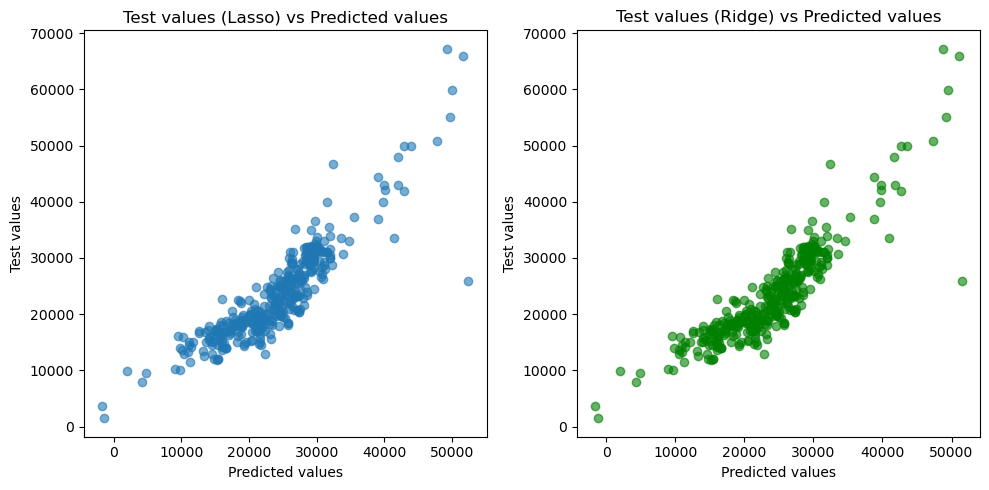

In [286]:
def plot_two_by_two_lasso_and_ridge_chart(lasso_predictions,ridge_predictions,Y_test):
    '''Plot a two by two chart laasso and ridge, the first param is the lasso predict,
    while the second param is the ridge predict and the last param is the actual y value '''
    fig = plt.figure(figsize=(10,5))


#lasso plot
    scatterd_plot_Lasso = fig.add_subplot(1,2,1)
    scatterd_plot_Lasso.scatter(lasso_predictions,Y_test,alpha=0.6)
    scatterd_plot_Lasso.set_ylabel("Test values")
    scatterd_plot_Lasso.set_xlabel("Predicted values")
    scatterd_plot_Lasso.set_title("Test values (Lasso) vs Predicted values")

#Ridge plot
    scatterd_plot_Ridge = fig.add_subplot(1,2,2)
    scatterd_plot_Ridge.scatter(ridge_predictions,Y_test,alpha=0.6,color="green")
    scatterd_plot_Ridge.set_ylabel("Test values")
    scatterd_plot_Ridge.set_xlabel("Predicted values")
    scatterd_plot_Ridge.set_title("Test values (Ridge) vs Predicted values")

    fig.tight_layout(w_pad=1.2)
    plt.show()

plot_two_by_two_lasso_and_ridge_chart(lasso_predictions,ridge_predictions,Y_test)

In [287]:
coefficients_dict = {
    "feature": X_train.columns,
    "coefficients_lasso":lasso_model.coef_,
    "coefficients_ridge":ridge_model.coef_
}

df_coef = pd.DataFrame(coefficients_dict)

df_coef

,feature,coefficients_lasso,coefficients_ridge
0,year,2084.962570,2066.206796
1,mileage,-0.182911,-0.185096
2,engine_size,9040.871995,8822.760548
3,transmission_Automatic,295.347929,322.951958
4,transmission_Manual,-2467.496676,-2167.548456
5,fuel_type_Diesel,-1716.446965,-1671.555884
6,fuel_type_Hybrid,-582.647533,-462.079930
7,fuel_type_Other,686.037662,189.588719


# 8-Polynomial-Regression-Model

## Polynomial-regresion-model-with-lasso
We will use same dataset as simpler linear regresion

In [288]:
## Create polynomial features for input data.

degree = 3  # Adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [289]:
##Fit the polynomial regression model with Lasso regularization:

poly_lasso_model = Lasso(alpha=best_alpha_lasso)
poly.fit(X_train_poly, Y_train)
poly_lasso_model.fit(X_train_poly, Y_train)

/Users/shedinho/miniconda3/envs/flight_delay-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+10, tolerance: 2.539e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [290]:
##Make predictions and evaluate the model:

poly_lasso_predictions = poly_lasso_model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(Y_test, poly_lasso_predictions))
r2 = r2_score(Y_test, poly_lasso_predictions)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


RMSE: 2704.38
R2: 0.90


## Polynomial-regresion-model-with-ridge

In [291]:
##creating a polynomial regression model with Ridge regularization:

poly_ridge_model = Ridge(alpha=best_alpha_ridge)
poly_ridge_model.fit(X_train_poly, Y_train)

poly_ridge_predictions = poly_ridge_model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(Y_test, poly_ridge_predictions))
r2 = r2_score(Y_test, poly_ridge_predictions)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


RMSE: 2810.51
R2: 0.89


/Users/shedinho/miniconda3/envs/flight_delay-env/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.26889e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


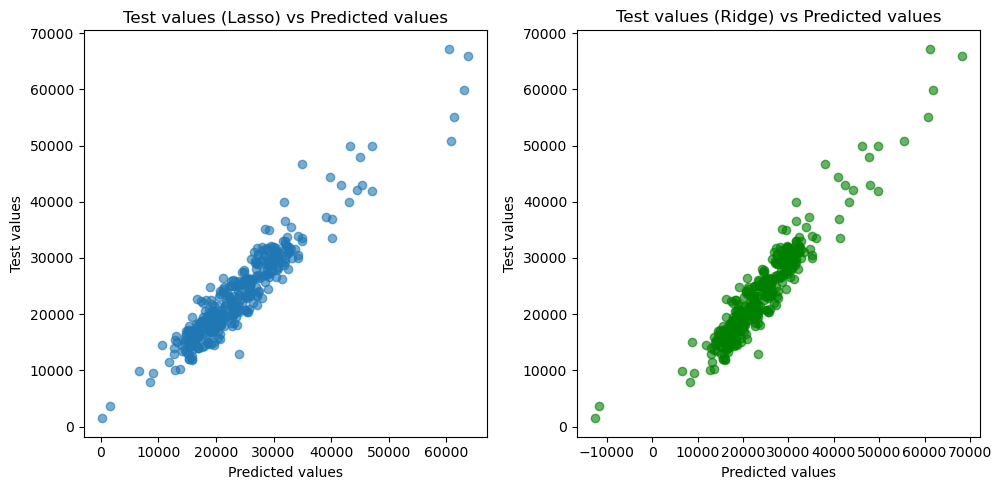

In [292]:
##Visualize the results Lasso:

plot_two_by_two_lasso_and_ridge_chart(poly_lasso_predictions,poly_ridge_predictions,Y_test)

____

# Competition

____

In [293]:
df_competition = pd.read_csv("./data/competition_data.csv")

In [294]:
df_competition.head()

,Unnamed: 0,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,0,2020.0,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,1,2020.0,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2,2020.0,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,3,2019.0,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,4,2019.0,29899,4500.0,2.0,1,0,0,0,1,0,0,0


The Unnamed: 0 has no meaning to the dataset we will drop it before commencing the analysis

In [295]:
df_competition.drop(["Unnamed: 0"],axis=1,inplace = True)

## feature selection

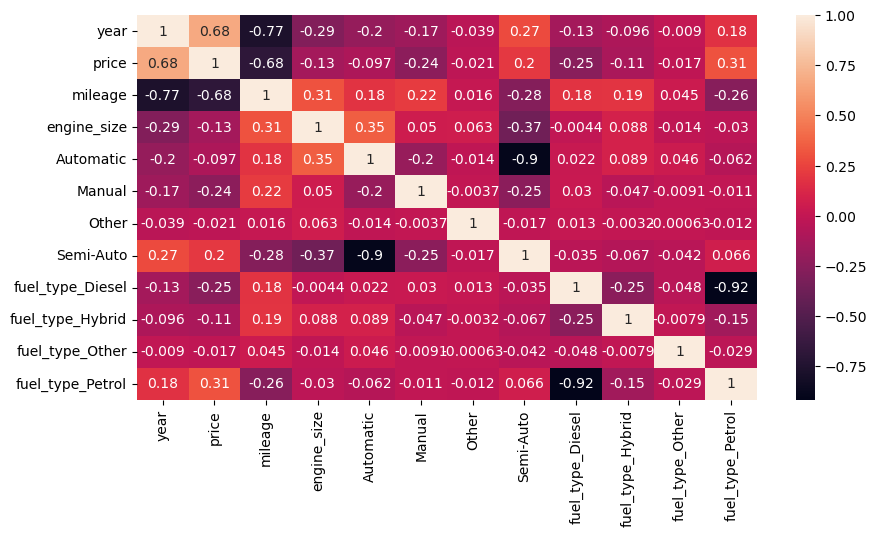

In [296]:
corr = df_competition.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,fmt=".2g")

plt.show()

    Year and milage has a strong correlation with the price of car.
    Also some multicollinearity can be observed between independent variables

## picking columns with corr greater than 0.2

In [297]:
cor_tar = abs(corr.price)
features_col = cor_tar[cor_tar>0.2]

selected_feaatures = pd.DataFrame({
    "features_name":features_col.index,
    "features_corrl":features_col.values
    })

selected_feaatures

,features_name,features_corrl
0,year,0.677500
1,price,1.000000
2,mileage,0.682020
3,Manual,0.242321
4,Semi-Auto,0.203717
5,fuel_type_Diesel,0.254180
6,fuel_type_Petrol,0.306063


In [298]:
df_competition = df_competition[selected_feaatures.features_name]

df_competition.head()

,year,price,mileage,Manual,Semi-Auto,fuel_type_Diesel,fuel_type_Petrol
0,2020.0,30495,1200.0,0,0,1,0
1,2020.0,29989,1000.0,0,0,0,1
2,2020.0,37899,500.0,0,0,1,0
3,2019.0,30399,5000.0,0,0,1,0
4,2019.0,29899,4500.0,0,0,1,0


## handling skewness

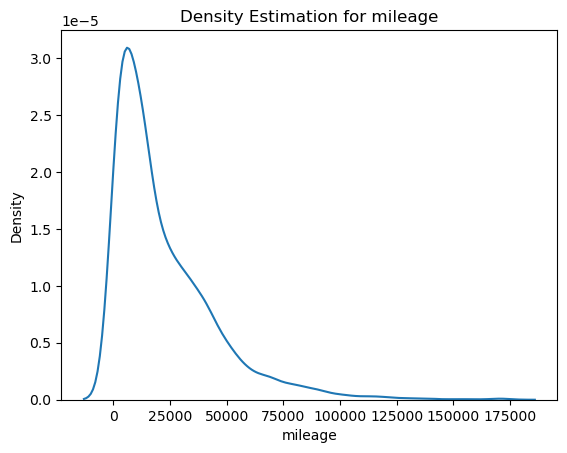

In [299]:
sns.kdeplot(df_competition.mileage)

plt.title("Density Estimation for mileage")
plt.show()

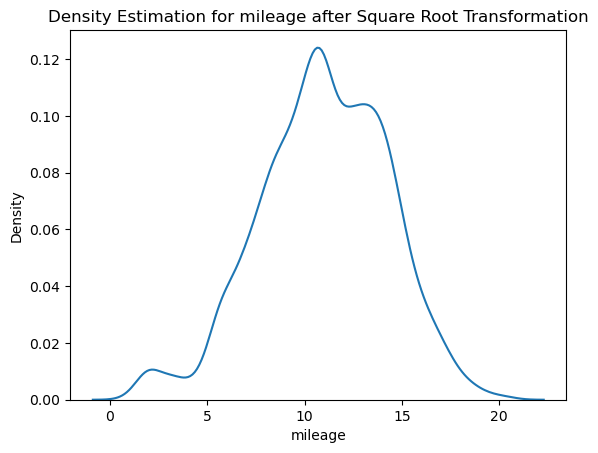

In [300]:
df_competition.mileage = np.sqrt(df_competition.mileage)

sns.kdeplot(np.sqrt(df_competition.mileage))

plt.title("Density Estimation for mileage after Square Root Transformation")
plt.show()

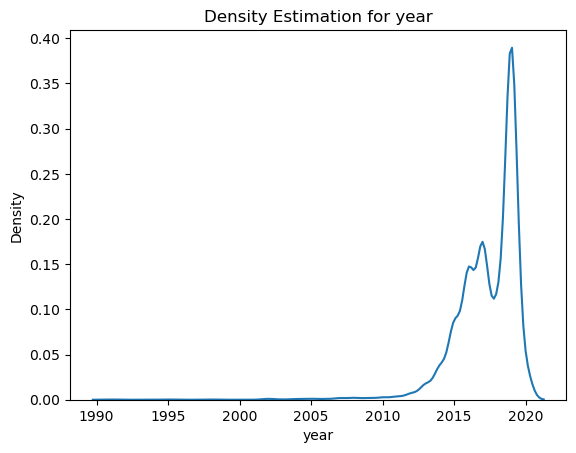

In [301]:
sns.kdeplot(df_competition.year)

plt.title("Density Estimation for year")
plt.show()

In [302]:
df_competition.year = np.log(df_competition.year)

## Split-the-dataset-into-training-and-test-sets
We will split 90:10 and using randomstate=1024.

In [303]:
response = df_competition.price
features = df_competition.drop(["price"],axis=1)

features.head()

,year,mileage,Manual,Semi-Auto,fuel_type_Diesel,fuel_type_Petrol
0,7.610853,34.641016,0,0,1,0
1,7.610853,31.622777,0,0,0,1
2,7.610853,22.360680,0,0,1,0
3,7.610358,70.710678,0,0,1,0
4,7.610358,67.082039,0,0,1,0


### feature scaling using StandardScaler

In [304]:
# scale the features
scaler = StandardScaler()

zscore = scaler.fit_transform(features)

feature_ss = pd.DataFrame(zscore, index=features.index, columns= features.columns)

X_train_ss, X_test_ss, Y_train_ss, Y_test_ss = train_test_split(feature_ss, response,test_size=0.1,random_state=1024)


df_training_ss = pd.concat([X_train_ss, pd.DataFrame(Y_train_ss)],axis=1)
df_training_ss.head()

,year,mileage,Manual,Semi-Auto,fuel_type_Diesel,fuel_type_Petrol,price
436,0.298848,-0.019808,-0.231976,0.939473,0.816147,-0.749198,18265
473,0.751517,-0.605897,-0.231976,-1.064427,0.816147,-0.749198,28332
2325,0.751517,-0.183972,-0.231976,0.939473,-1.225269,1.334760,19849
3715,0.751517,0.230914,-0.231976,-1.064427,-1.225269,1.334760,34890
561,-0.607164,0.372331,-0.231976,0.939473,0.816147,-0.749198,19750


### checkig for outliers

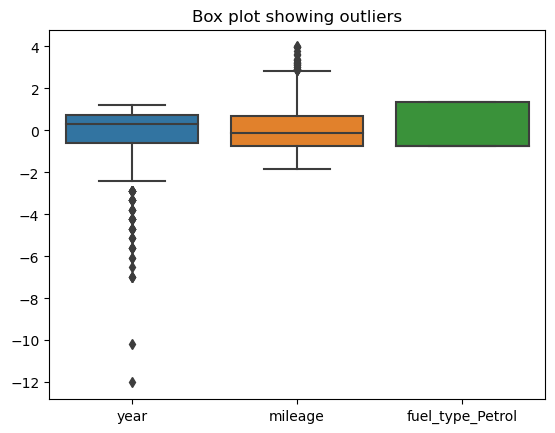

In [305]:
sns.boxplot(df_training_ss[["year","mileage","fuel_type_Petrol"]])
plt.title("Box plot showing outliers")

plt.show()

### Using IQR approach to remove outliers

In [306]:
Q1 = df_training_ss.mileage.quantile(0.25)
Q3 = df_training_ss.mileage.quantile(0.75)

IQR=Q3-Q1
outliers_based_mileage = df_training_ss.loc[((df_training_ss.mileage<(Q1-1.5*IQR)) | (df_training_ss.mileage>(Q3+1.5*IQR)))]
# description of the outliers
get_data_description(outliers_based_mileage)

We have 25 rows and 7 columns in the data set


In [307]:
df_training_ss.drop(outliers_based_mileage.index,inplace=True)

In [308]:
Q1 = df_training_ss.year.quantile(0.25)
Q3 = df_training_ss.year.quantile(0.75)

IQR=Q3-Q1
outliers_based_year = df_training_ss.loc[((df_training_ss.year<(Q1-1.5*IQR)) | (df_training_ss.year>(Q3+1.5*IQR)))]
# description of the outliers
get_data_description(outliers_based_year)

We have 40 rows and 7 columns in the data set


In [309]:
df_training_ss.drop(outliers_based_year.index,inplace=True)

In [310]:
get_data_description(df_training_ss)

We have 3442 rows and 7 columns in the data set


    from the distribution the data is skewed to the right.
    we can apply

In [311]:
X_train_ss = df_training_ss.drop(["price"],axis=1)
Y_train_ss = df_training_ss.price

## linear models (Simple/Lasso/Ridge) ---Trainign and predicting

In [312]:
#finding best 

alphas_ridge = 10**np.linspace(5,-5,20)
alphas_lasso = np.linspace(0.5,0.1,20)

sim_dict = find_best_alpha_value_lasso_ridge(alphas_ridge,alphas_lasso,X_train_ss,Y_train_ss,X_test_ss,Y_test_ss)

simulated_alphas_df = pd.DataFrame(sim_dict) 


simulated_alphas_df

,alpha_lasso,R2_Lasso_test,R2_Lasso_train,RMSE_Lasso,alpha_ridge,R2_Ridge_test,R2_Ridge_train,RMSE_Ridge
0,0.500000,0.628777,0.580578,60.549865,100000.000000,0.071246,0.063576,82.258372
1,0.478947,0.628777,0.580578,60.549924,29763.514416,0.196804,0.175404,78.732572
2,0.457895,0.628776,0.580578,60.550004,8858.667904,0.406789,0.363137,71.842921
3,0.436842,0.628776,0.580578,60.550084,2636.650899,0.572375,0.515806,63.460299
4,0.415789,0.628775,0.580578,60.550146,784.759970,0.624153,0.569812,60.294234
5,0.394737,0.628775,0.580578,60.550226,233.572147,0.629852,0.579344,60.343273
6,0.373684,0.628774,0.580578,60.550306,69.519280,0.629364,0.580458,60.472783
7,0.352632,0.628774,0.580578,60.550371,20.691381,0.628969,0.580567,60.526946
8,0.331579,0.628773,0.580578,60.550450,6.158482,0.628828,0.580577,60.544268
9,0.310526,0.628773,0.580578,60.550530,1.832981,0.628784,0.580578,60.549431


In [313]:
best_alpha_lasso = simulated_alphas_df.loc[simulated_alphas_df.R2_Lasso_test == simulated_alphas_df.R2_Lasso_test.max()].alpha_lasso.values[0]
best_alpha_ridge = simulated_alphas_df.loc[simulated_alphas_df.R2_Ridge_test == simulated_alphas_df.R2_Ridge_test.max()].alpha_ridge.values[0]


In [314]:
simple = LinearRegression()
lasso_model = Lasso(alpha=best_alpha_lasso)  
ridge_model = Ridge(alpha=best_alpha_ridge)

In [315]:
simple.fit(X_train_ss,Y_train_ss)
lasso_model.fit(X_train_ss, Y_train_ss)
ridge_model.fit(X_train_ss, Y_train_ss)

lasso_predictions = lasso_model.predict(X_test_ss)
ridge_predictions = ridge_model.predict(X_test_ss)
simple_predictions = simple.predict(X_test_ss)

## Evaluation linear models (Simple/Lasso/Ridge)

In [316]:
# R-squared
r2_test_simple = simple.score(X_test_ss,Y_test_ss)
r2_train_simple = simple.score(X_train_ss,Y_train_ss)

r2_test_lasso = lasso_model.score(X_test_ss,Y_test_ss)
r2_train_lasso = lasso_model.score(X_train_ss,Y_train_ss)

r2_test_ridge = lasso_model.score(X_test_ss,Y_test_ss)
r2_train_ridge = lasso_model.score(X_train_ss,Y_train_ss)

In [317]:
# RMSE

RMSE_Lasso = math.sqrt(mean_absolute_error(Y_test_ss,lasso_predictions))
RMSE_Ridge = math.sqrt(mean_absolute_error(Y_test_ss,ridge_predictions))
RMSE_Simple = math.sqrt(mean_absolute_error(Y_test_ss,simple_predictions))


In [318]:
performance_metric_dict = {
    "Model":["simple linear", "lasso linear", "ridge linear"],
    "R_squared_test":[r2_test_simple,r2_test_lasso,r2_test_ridge],
    "R_squared_train":[r2_train_simple,r2_train_lasso,r2_train_ridge],
    "RMSE":[RMSE_Simple,RMSE_Lasso,RMSE_Simple]
}

pd.DataFrame(performance_metric_dict)

,Model,R_squared_test,R_squared_train,RMSE
0,simple linear,0.628765,0.580578,60.551619
1,lasso linear,0.628777,0.580578,60.549865
2,ridge linear,0.628777,0.580578,60.551619


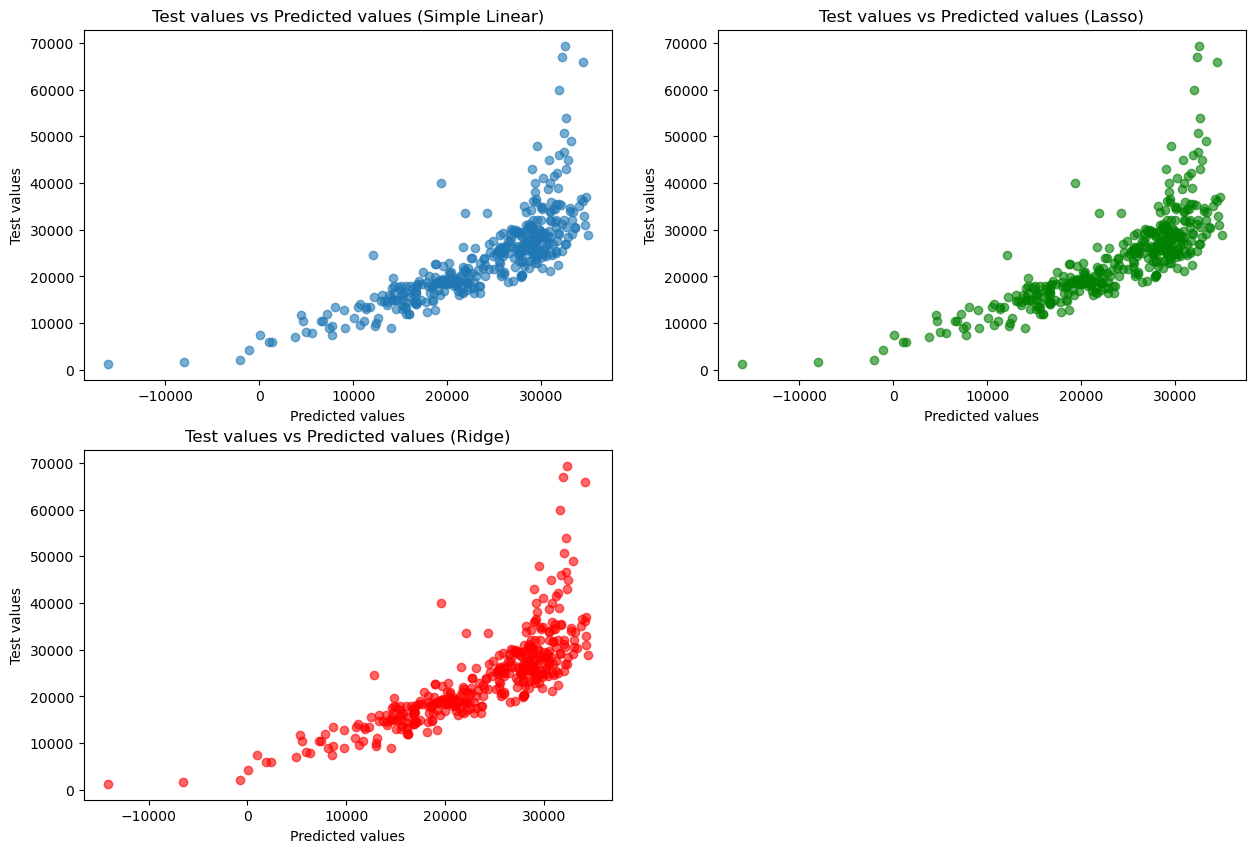

In [319]:
fig = plt.figure(figsize=(15,10))

simple_linear = fig.add_subplot(2,2,1)
lasso_linear = fig.add_subplot(2,2,2)
ridge_linear = fig.add_subplot(2,2,3)

simple_linear.scatter(simple_predictions,Y_test_ss,alpha=0.6)
simple_linear.set_title("Test values vs Predicted values (Simple Linear)")
simple_linear.set_ylabel("Test values")
simple_linear.set_xlabel("Predicted values")

lasso_linear.scatter(lasso_predictions,Y_test_ss,alpha=0.6,color = "green")
lasso_linear.set_title("Test values vs Predicted values (Lasso)")
lasso_linear.set_ylabel("Test values")
lasso_linear.set_xlabel("Predicted values")

ridge_linear.scatter(ridge_predictions,Y_test_ss,alpha=0.6,color = "red")
ridge_linear.set_title("Test values vs Predicted values (Ridge)")
ridge_linear.set_ylabel("Test values")
ridge_linear.set_xlabel("Predicted values")

plt.show()

## Polynomial-Regression-Model Training and predicting

In [320]:
degree = 2  # Adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_ss)
X_test_poly = poly.transform(X_test_ss)

In [321]:
poly_lasso_model = Lasso(alpha=best_alpha_lasso)
poly_ridge_model = Ridge(alpha=best_alpha_ridge,positive=True)
poly_simple = LinearRegression()

In [322]:
poly.fit(X_train_poly,Y_train_ss)

poly_lasso_model.fit(X_train_poly, Y_train_ss)
poly_ridge_model.fit(X_train_poly, Y_train_ss)
poly_simple.fit(X_train_poly, Y_train_ss)

poly_ridge_predictions = poly_ridge_model.predict(X_test_poly)
poly_lasso_predictions = poly_lasso_model.predict(X_test_poly)
poly_simple_predictions = poly_simple.predict(X_test_poly)


/Users/shedinho/miniconda3/envs/flight_delay-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e+09, tolerance: 2.536e+07
  model = cd_fast.enet_coordinate_descent(


## Evaluation polynomial models (Simple/Lasso/Ridge)

In [323]:
# R-squared
r2_test_simple = poly_simple.score(X_test_poly,Y_test_ss)
r2_train_simple = poly_simple.score(X_train_poly,Y_train_ss)

r2_test_lasso = poly_lasso_model.score(X_test_poly,Y_test_ss)
r2_train_lasso = poly_lasso_model.score(X_train_poly,Y_train_ss)

r2_test_ridge = poly_ridge_model.score(X_test_poly,Y_test_ss)
r2_train_ridge = poly_ridge_model.score(X_train_poly,Y_train_ss)

In [324]:
# RMSE

RMSE_Lasso = math.sqrt(mean_absolute_error(Y_test_ss,poly_lasso_predictions))
RMSE_Ridge = math.sqrt(mean_absolute_error(Y_test_ss,poly_ridge_predictions))
RMSE_Simple = math.sqrt(mean_absolute_error(Y_test_ss,poly_simple_predictions))

In [325]:
performance_metric_dict = {
    "Model":["simple poly", "lasso poly", "ridge poly"],
    "R_squared_test":[r2_test_simple,r2_test_lasso,r2_test_ridge],
    "R_squared_train":[r2_train_simple,r2_train_lasso,r2_train_ridge],
    "RMSE":[RMSE_Simple,RMSE_Lasso,RMSE_Simple]
}

pd.DataFrame(performance_metric_dict)

,Model,R_squared_test,R_squared_train,RMSE
0,simple poly,0.524997,0.605716,60.952651
1,lasso poly,0.525653,0.605729,60.941264
2,ridge poly,0.570208,0.529025,60.952651


    Polynomial regresion does not seem to be a perfect fit

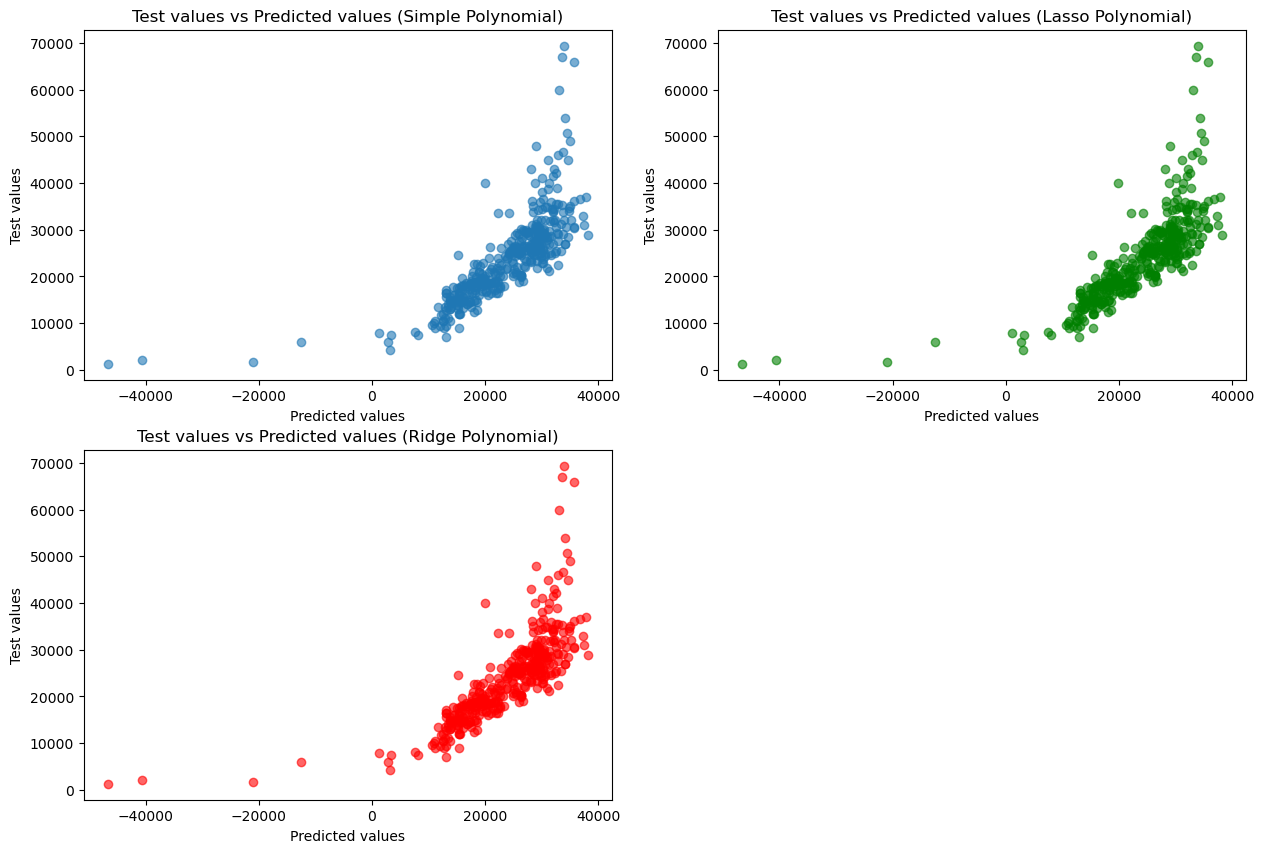

In [326]:
fig = plt.figure(figsize=(15,10))

simple_linear = fig.add_subplot(2,2,1)
lasso_linear = fig.add_subplot(2,2,2)
ridge_linear = fig.add_subplot(2,2,3)

simple_linear.scatter(poly_simple_predictions,Y_test_ss,alpha=0.6)
simple_linear.set_title("Test values vs Predicted values (Simple Polynomial)")
simple_linear.set_ylabel("Test values")
simple_linear.set_xlabel("Predicted values")

lasso_linear.scatter(poly_lasso_predictions,Y_test_ss,alpha=0.6,color = "green")
lasso_linear.set_title("Test values vs Predicted values (Lasso Polynomial)")
lasso_linear.set_ylabel("Test values")
lasso_linear.set_xlabel("Predicted values")

ridge_linear.scatter(poly_simple_predictions,Y_test_ss,alpha=0.6,color = "red")
ridge_linear.set_title("Test values vs Predicted values (Ridge Polynomial)")
ridge_linear.set_ylabel("Test values")
ridge_linear.set_xlabel("Predicted values")

plt.show()

# Member Contribution 

| Evaluator/Evaluatee |Shedrach Ezenwali   | Bryan Rodriguez | Hazel Ibasco | Nathaniel Pearson|
|------|------| ------| ------| ------|
| Shedrach Ezenwali | - | 4 | 4 | 4 |
| Bryan Rodriguez | 4 | - | 4 | 4 | 
| Hazel Ibasco | 4 | 4 | - | 4 |
| Nathaniel Pearson |4|4 |4 | - |